<a href="https://colab.research.google.com/github/joaovictojuliao/Squad-2-M4/blob/Elizangela/M4_Squad_2_Projeto_Final_an%C3%A1lise_explorat%C3%B3ria_pre%C3%A7os_de_combust%C3%ADveis_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise Exploratória dos Preços de Combustíveis no Brasil**

# **1. Introdução**

- Falar do objetivo e contexto da indústria dos combustíveis

Explicando como o preço dos combustíveis é formado
https://www.gov.br/anp/pt-br/assuntos/precos-e-defesa-da-concorrencia/precos/composicao-e-estruturas-de-formacao-dos-precos

# **2. Apresentando os dados originais**



### **2.1 - Importação e concatenação**
 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importando a biblioteca Pandas e Matplotlib:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Importando dados do mês de julho:

combustiveis_julho = pd.read_csv("/content/drive/MyDrive/Resilia - Módulo 4 - Projeto Final /CSV/precos-gasolina-etanol-07.csv", sep = ';')

# Importando dados do mês de agosto:

combustiveis_agosto = pd.read_csv("/content/drive/MyDrive/Resilia - Módulo 4 - Projeto Final /CSV/precos-gasolina-etanol-08.csv", sep=';')

In [ ]:
#Criando um novo dataset com a junção das tabelas anteriores:

combustiveis = pd.concat([combustiveis_julho, combustiveis_agosto])

### **2.2 -  Conhencendo a estrutura geral dos dados**

In [ ]:
# Identificando o formato do dataset original
# O output retorna a quantidade de linhas e colunas, respectivamente:
combustiveis.shape

(127176, 16)

In [ ]:
# Visualizando o dataset
# O output retorna as 5 primeiras e 5 últimas linhas do dataframe.

combustiveis

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA ADITIVADA,01/07/2022,"7,48",NaN,R$ / litro,VIBRA ENERGIA
1,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA,01/07/2022,"7,38",NaN,R$ / litro,VIBRA ENERGIA
2,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LETRA A,LACE,29703-055,ETANOL,01/07/2022,"5,99",NaN,R$ / litro,VIBRA ENERGIA
3,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LETRA A,LACE,29703-055,GASOLINA,01/07/2022,"7,39",NaN,R$ / litro,VIBRA ENERGIA
4,CO,GO,GOIANIA,JUSTINIANO & JUSTINIANO LTDA,04.489.287/0001-16,AVENIDA JOSE LEANDRO DA CRUZ,"2,36","QUADRA 18, LOTE 01",PARQUE AMAZONIA,74840-390,GASOLINA ADITIVADA,01/07/2022,"6,49",NaN,R$ / litro,IPIRANGA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69539,CO,DF,BRASILIA,POSTO TOP TAGUATINGA COMERCIO DE COMBUSTIVEIS ...,37.189.518/0001-25,QUADRA QI 23 LOTES 40/41,42,POSTO DE GASOLINA 01,SETOR INDUSTRIAL (TAGUATINGA),72135-230,ETANOL,31/08/2022,"3,99",NaN,R$ / litro,IPIRANGA
69540,CO,DF,BRASILIA,POSTO TOP TAGUATINGA COMERCIO DE COMBUSTIVEIS ...,37.189.518/0001-25,QUADRA QI 23 LOTES 40/41,42,POSTO DE GASOLINA 01,SETOR INDUSTRIAL (TAGUATINGA),72135-230,GASOLINA,31/08/2022,"5,19",NaN,R$ / litro,IPIRANGA
69541,CO,DF,BRASILIA,POSTO TOP TAGUATINGA COMERCIO DE COMBUSTIVEIS ...,37.189.518/0001-25,QUADRA QI 23 LOTES 40/41,42,POSTO DE GASOLINA 01,SETOR INDUSTRIAL (TAGUATINGA),72135-230,GASOLINA ADITIVADA,31/08/2022,"5,19",NaN,R$ / litro,IPIRANGA
69542,SE,MG,JANAUBA,AUTO POSTO COMBUSTIVEIS VERAS SANTANA LTDA,33.063.482/0001-88,AVENIDA DA SAUDADE,656,NaN,SANTO ANTONIO,39447-190,GASOLINA,31/08/2022,"5,27",NaN,R$ / litro,BRANCA


In [ ]:
# Conferindo os tipos de dados do dataset:
display(combustiveis.dtypes)

Regiao - Sigla        object
Estado - Sigla        object
Municipio             object
Revenda               object
CNPJ da Revenda       object
Nome da Rua           object
Numero Rua            object
Complemento           object
Bairro                object
Cep                   object
Produto               object
Data da Coleta        object
Valor de Venda        object
Valor de Compra      float64
Unidade de Medida     object
Bandeira              object
dtype: object

### **2.2 Conclusões**

# **3. Tratamento inicial dos dados**

In [ ]:
# Eliminando as colunas desnecessárias para a análise:
combustiveis.drop(["CNPJ da Revenda", "Nome da Rua", "Numero Rua", "Complemento", "Bairro", "Cep", "Valor de Compra", "Unidade de Medida"], axis=1, inplace=True)

In [ ]:
# Definindo a coluna 'Produto' como novo índex para o dataset:
combustiveis = combustiveis.set_index('Produto')

In [ ]:
#Convertendo a coluna 'Valor de Venda' para tipo float e alterando o separador decimal para ponto:
combustiveis['Valor de Venda'] = combustiveis['Valor de Venda'].str.replace(',','.').astype(float)

In [ ]:
#Convertendo a coluna 'Data da Coleta' para tipo datetime:
combustiveis['Data da Coleta'] = pd.to_datetime( combustiveis['Data da Coleta'], format="%d/%m/%Y")
combustiveis


,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,Data da Coleta,Valor de Venda,Bandeira
Produto,,,,,,,
GASOLINA ADITIVADA,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,2022-07-01,7.48,VIBRA ENERGIA
GASOLINA,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,2022-07-01,7.38,VIBRA ENERGIA
ETANOL,SE,ES,COLATINA,POSTO MOTOCAP LTDA,2022-07-01,5.99,VIBRA ENERGIA
GASOLINA,SE,ES,COLATINA,POSTO MOTOCAP LTDA,2022-07-01,7.39,VIBRA ENERGIA
GASOLINA ADITIVADA,CO,GO,GOIANIA,JUSTINIANO & JUSTINIANO LTDA,2022-07-01,6.49,IPIRANGA
...,...,...,...,...,...,...,...
ETANOL,CO,DF,BRASILIA,POSTO TOP TAGUATINGA COMERCIO DE COMBUSTIVEIS ...,2022-08-31,3.99,IPIRANGA
GASOLINA,CO,DF,BRASILIA,POSTO TOP TAGUATINGA COMERCIO DE COMBUSTIVEIS ...,2022-08-31,5.19,IPIRANGA
GASOLINA ADITIVADA,CO,DF,BRASILIA,POSTO TOP TAGUATINGA COMERCIO DE COMBUSTIVEIS ...,2022-08-31,5.19,IPIRANGA


# **4. Verificando a qualidade dos dados**

### **4.1 - Identificando dados nulos**

In [ ]:
combustiveis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127176 entries, GASOLINA ADITIVADA to ETANOL
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Regiao - Sigla  127176 non-null  object        
 1   Estado - Sigla  127176 non-null  object        
 2   Municipio       127176 non-null  object        
 3   Revenda         127176 non-null  object        
 4   Data da Coleta  127176 non-null  datetime64[ns]
 5   Valor de Venda  127176 non-null  float64       
 6   Bandeira        127176 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 7.8+ MB


### **4.2 - Identificando dados duplicados:**

In [ ]:
combustiveis.value_counts()

Regiao - Sigla  Estado - Sigla  Municipio    Revenda                                               Produto             Data da Coleta  Valor de Venda  Bandeira
CO              DF              BRASILIA     CASCOL COMBUSTIVEIS PARA VEICULOS LTDA                GASOLINA ADITIVADA  2022-07-26      5.93            BRANCA      6
                                                                                                   GASOLINA            2022-07-26      5.93            BRANCA      6
NE              CE              FORTALEZA    SOBRAL & PALACIO PETROLEO LTDA                        GASOLINA            2022-08-16      5.69            RAIZEN      5
                                                                                                   GASOLINA ADITIVADA  2022-08-16      5.99            RAIZEN      5
CO              GO              RIO VERDE    AUTO POSTO BARATEIRO LTDA                             ETANOL              2022-07-06      4.29            BRANCA      5
               

In [ ]:
#Retirando os dados duplicados:
combustiveis.drop_duplicates()


,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,Produto,Data da Coleta,Valor de Venda,Bandeira
0,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,GASOLINA ADITIVADA,2022-07-01,7.48,VIBRA ENERGIA
1,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,GASOLINA,2022-07-01,7.38,VIBRA ENERGIA
2,SE,ES,COLATINA,POSTO MOTOCAP LTDA,ETANOL,2022-07-01,5.99,VIBRA ENERGIA
3,SE,ES,COLATINA,POSTO MOTOCAP LTDA,GASOLINA,2022-07-01,7.39,VIBRA ENERGIA
4,CO,GO,GOIANIA,JUSTINIANO & JUSTINIANO LTDA,GASOLINA ADITIVADA,2022-07-01,6.49,IPIRANGA
...,...,...,...,...,...,...,...,...
69539,CO,DF,BRASILIA,POSTO TOP TAGUATINGA COMERCIO DE COMBUSTIVEIS ...,ETANOL,2022-08-31,3.99,IPIRANGA
69540,CO,DF,BRASILIA,POSTO TOP TAGUATINGA COMERCIO DE COMBUSTIVEIS ...,GASOLINA,2022-08-31,5.19,IPIRANGA
69541,CO,DF,BRASILIA,POSTO TOP TAGUATINGA COMERCIO DE COMBUSTIVEIS ...,GASOLINA ADITIVADA,2022-08-31,5.19,IPIRANGA
69542,SE,MG,JANAUBA,AUTO POSTO COMBUSTIVEIS VERAS SANTANA LTDA,GASOLINA,2022-08-31,5.27,BRANCA


### **4.3 - Identificando outliers - Histogramas**

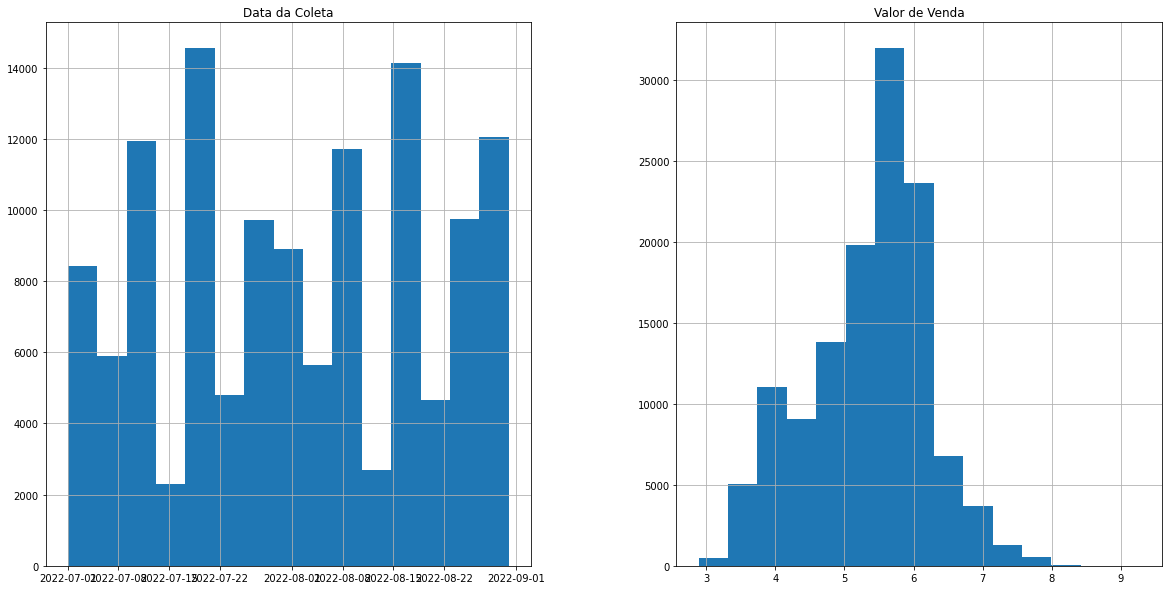

In [ ]:
# Visualizando a distribuição da variável 'Valor de Venda'
combustiveis.hist(bins=15, figsize=(20,10));

### **4.4 - Identificando outliers - estatísticas descritivas**

In [ ]:
#Principais estatísticas usando a função describe:
combustiveis.describe()

,Valor de Venda
count,127176.000000
mean,5.355503
std,0.860449
min,2.890000
25%,4.880000
50%,5.490000
75%,5.890000
max,9.270000


### **4.5 - Identificando outliers - Boxplots**

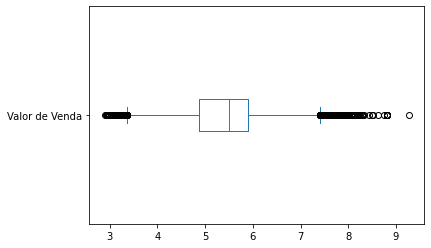

In [ ]:
# Considerando todos os combustíveis: gasolina comum, gasolina aditivada e etanol
bp1 = pd.DataFrame(combustiveis, columns=["Valor de Venda"])
bp1.plot.box(vert=False);

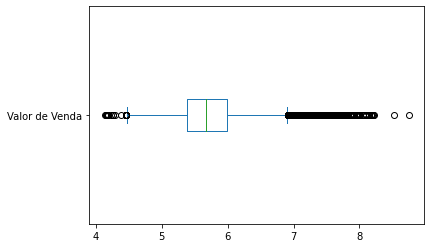

In [ ]:
# Considerando apenas os preços da gasolina comum:
gasolina_comum = combustiveis.loc['GASOLINA']
bp2 = pd.DataFrame(gasolina_comum, columns=["Valor de Venda"])
bp2.plot.box(vert=False);

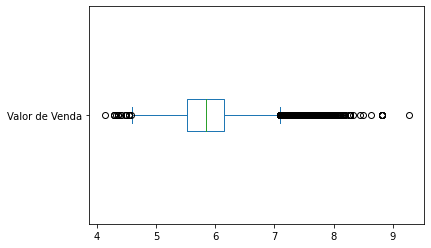

In [ ]:
# Considerando apenas os preços da gasolina aditivada:
gasolina_aditivada = combustiveis.loc['GASOLINA ADITIVADA']
bp3 = pd.DataFrame(gasolina_aditivada, columns=["Valor de Venda"])
bp3.plot.box(vert=False);

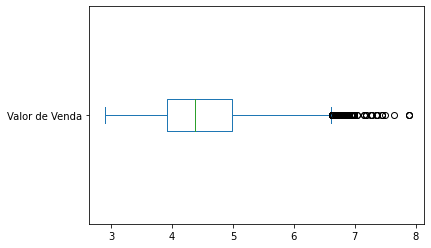

In [ ]:
# Considerando apenas os preços do etanol:
etanol = combustiveis.loc['ETANOL']
bp4 = pd.DataFrame(etanol, columns=["Valor de Venda"])
bp4.plot.box(vert=False);


### **4.6 - Conclusões iniciais sobre outliers no dataset**



* Retirar os outliers e calcular novamente dados como média, desvio-padrão, etc para entender o seu impacto.







### **4.7 - Retirando os outliers**

### **4.8 - Calculando novamente as medidas descritivas**

### **4.9 - Conclusões finais sobre outliers no dataset**

# **5. Análise Exploratória**

### 1ª Pergunta Extra: Como se comportaram o preço médio dos combustíveis ao longo de 2022 (jan-ago) no país?

### **Pergunta 1: Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram um aumento ou diminuição?**

In [ ]:
#Brasil - GASOLINA COMUM
gasolina_comum.groupby('Data da Coleta')[['Valor de Venda']].mean().sort_values(['Data da Coleta', 'Valor de Venda'], ascending=True)

,Valor de Venda
Data da Coleta,
2022-07-01,7.173200
2022-07-04,6.612834
2022-07-05,6.611722
2022-07-06,6.392098
2022-07-07,6.222464
2022-07-08,6.152927
2022-07-11,6.130474
2022-07-12,6.123583
2022-07-13,6.016459


In [ ]:
#Brasil - GASOLINA ADITIVADA
gasolina_aditivada.groupby('Data da Coleta')[['Valor de Venda']].mean().sort_values(['Data da Coleta', 'Valor de Venda'], ascending=True)


,Valor de Venda
Data da Coleta,
2022-07-01,7.248261
2022-07-04,6.786824
2022-07-05,6.795097
2022-07-06,6.573684
2022-07-07,6.408225
2022-07-08,6.290370
2022-07-11,6.298553
2022-07-12,6.315667
2022-07-13,6.208035


In [ ]:
#Brasil - ETANOL
etanol.groupby('Data da Coleta')[['Valor de Venda']].mean().sort_values(['Data da Coleta', 'Valor de Venda'], ascending=True)


,Valor de Venda
Data da Coleta,
2022-07-01,5.395652
2022-07-04,4.879523
2022-07-05,5.158455
2022-07-06,4.944885
2022-07-07,4.820669
2022-07-08,4.753214
2022-07-11,4.842278
2022-07-12,4.928487
2022-07-13,4.659464


In [ ]:
#Filtrar por regiões - GASOLINA COMUM
gasolina_comum.groupby(['Data da Coleta', 'Regiao - Sigla'])[['Valor de Venda']].mean().sort_values(['Data da Coleta', 'Valor de Venda'], ascending=True)


Valor de Venda
Data da Coleta Regiao - Sigla                
2022-07-01     CO                    6.340000
               S                     6.360000
               SE                    7.302500
               NE                    7.660000
2022-07-04     CO                    6.329684
...                                       ...
2022-08-31     SE                    5.067949
               CO                    5.177558
               S                     5.201145
               NE                    5.324720
               N                     5.736333

[203 rows x 1 columns]

In [ ]:
#Filtrar por regiões - GASOLINA ADITIVADA
gasolina_aditivada.groupby(['Data da Coleta', 'Regiao - Sigla'])[['Valor de Venda']].mean().sort_values(['Data da Coleta', 'Valor de Venda'], ascending=True)

Valor de Venda
Data da Coleta Regiao - Sigla                
2022-07-01     S                     6.470000
               CO                    6.530000
               SE                    7.403636
               NE                    7.701667
2022-07-04     CO                    6.501837
...                                       ...
2022-08-31     SE                    5.267778
               CO                    5.300756
               S                     5.338511
               NE                    5.469224
               N                     5.800357

[202 rows x 1 columns]

In [ ]:
#Filtrar por regiões - ETANOL
etanol.groupby(['Data da Coleta', 'Regiao - Sigla'])[['Valor de Venda']].mean().sort_values(['Data da Coleta', 'Valor de Venda'], ascending=True)

Valor de Venda
Data da Coleta Regiao - Sigla                
2022-07-01     CO                    4.297500
               NE                    5.563333
               SE                    5.650000
               S                     5.690000
2022-07-04     SE                    4.527937
...                                       ...
2022-08-31     SE                    3.664320
               CO                    3.746331
               S                     4.259185
               NE                    4.612030
               N                     5.292778

[203 rows x 1 columns]

In [ ]:
#Filtrar por estados - GASOLINA COMUM
gasolina_comum.groupby(['Data da Coleta', 'Estado - Sigla'])[['Valor de Venda']].mean().sort_values(['Data da Coleta', 'Valor de Venda'], ascending=True)


Valor de Venda
Data da Coleta Estado - Sigla                
2022-07-01     GO                    6.340000
               SC                    6.360000
               SP                    6.640000
               ES                    7.385000
               PI                    7.660000
...                                       ...
2022-08-31     MA                    5.560000
               RR                    5.690000
               PA                    5.885172
               AM                    6.000000
               AC                    6.567143

[888 rows x 1 columns]

In [ ]:
#Filtrar por estados - GASOLINA ADITIVADA
gasolina_aditivada.groupby(['Data da Coleta', 'Estado - Sigla'])[['Valor de Venda']].mean().sort_values(['Data da Coleta', 'Valor de Venda'], ascending=True)

Valor de Venda
Data da Coleta Estado - Sigla                
2022-07-01     SC                    6.470000
               GO                    6.530000
               SP                    6.840000
               ES                    7.480000
               PI                    7.701667
...                                       ...
2022-08-31     AM                    5.622000
               MA                    5.622222
               RR                    5.791250
               PA                    6.028947
               AC                    6.620000

[876 rows x 1 columns]

In [ ]:
#Filtrar por estados - ETANOL
etanol.groupby(['Data da Coleta', 'Estado - Sigla'])[['Valor de Venda']].mean().sort_values(['Data da Coleta', 'Valor de Venda'], ascending=True)

Valor de Venda
Data da Coleta Estado - Sigla                
2022-07-01     SP                    4.290000
               GO                    4.297500
               PI                    5.563333
               SC                    5.690000
               ES                    5.990000
...                                       ...
2022-08-31     MA                    5.190000
               RS                    5.348000
               RR                    5.400000
               PA                    5.659000
               AC                    5.740000

[854 rows x 1 columns]

In [ ]:
#Filtrar por municípios - GASOLINA COMUM
gasolina_comum.groupby(['Data da Coleta', 'Estado - Sigla', 'Municipio'])[['Valor de Venda']].mean().sort_values(['Data da Coleta', 'Valor de Venda'], ascending=True)


Valor de Venda
Data da Coleta Estado - Sigla Municipio                            
2022-07-01     GO             GOIANIA                      6.340000
               SC             JOINVILLE                    6.360000
               SP             BARUERI                      6.390000
                              VALINHOS                     6.723333
               ES             COLATINA                     7.385000
...                                                             ...
2022-08-31     PE             SALGUEIRO                    6.032857
               PA             XINGUARA                     6.162500
                              CONCEICAO DO ARAGUAIA        6.260000
               AC             CRUZEIRO DO SUL              6.567143
               AM             TEFE                         6.860000

[5553 rows x 1 columns]

In [ ]:
#Filtrar por municípios - GASOLINA ADITIVADA
gasolina_aditivada.groupby(['Data da Coleta', 'Estado - Sigla', 'Municipio'])[['Valor de Venda']].mean().sort_values(['Data da Coleta', 'Valor de Venda'], ascending=True)

Valor de Venda
Data da Coleta Estado - Sigla Municipio                            
2022-07-01     SC             JOINVILLE                    6.470000
               GO             GOIANIA                      6.530000
               SP             BARUERI                      6.690000
                              VALINHOS                     6.890000
               ES             COLATINA                     7.480000
...                                                             ...
2022-08-31     CE             JUAZEIRO DO NORTE            6.210000
               PA             XINGUARA                     6.210000
                              CONCEICAO DO ARAGUAIA        6.293333
               AC             CRUZEIRO DO SUL              6.620000
               BA             JAGUAQUARA                   8.820000

[5301 rows x 1 columns]

In [ ]:
#Filtrar por municípios - ETANOL
etanol.groupby(['Data da Coleta', 'Estado - Sigla', 'Municipio'])[['Valor de Venda']].mean().sort_values(['Data da Coleta', 'Valor de Venda'], ascending=True)

Valor de Venda
Data da Coleta Estado - Sigla Municipio                      
2022-07-01     SP             BARUERI                4.290000
                              VALINHOS               4.290000
               GO             GOIANIA                4.297500
               PI             TERESINA               5.563333
               SC             JOINVILLE              5.690000
...                                                       ...
2022-08-31     RS             VACARIA                5.717500
               AC             CRUZEIRO DO SUL        5.740000
               PA             XINGUARA               5.884000
               RS             BAGE                   6.466000
               SC             CRICIUMA               6.540000

[5328 rows x 1 columns]

### **Pergunta 2: Qual o preço médio da gasolina e do etanol nesses dois meses?**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


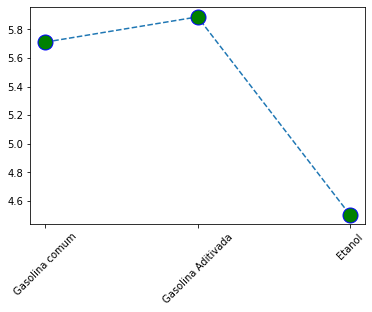

In [ ]:
dataComb=[['Gasolina comum',gasolina_comum.mean()],['Gasolina Aditivada',gasolina_aditivada.mean()],['Etanol',etanol.mean()]]
data2 = pd.DataFrame(dataComb, columns=['Combustivel', 'Média'])
plt.plot(data2['Combustivel'],data2['Média'], marker='o', mfc='g', mec='b', linestyle='--', ms=15)
plt.xticks(rotation=45);

### **Pergunta 3: Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?**

### **Pergunta 4: Qual o preço médio da gasolina e do etanol por estado?**

### **Pergunta 5: Qual o município que possui o menor preço para a gasolina e para o etanol?**

### **Pergunta 6: Qual o município que possui o maior preço para a gasolina e para o etanol?**

### **Pergunta 7: Qual a região que possui o maior valor médio da gasolina?**

### **Pergunta 8: Qual a região que possui o menor valor médio do etanol?**

### **Pergunta 9: Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?**

### **Pergunta 10: Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?**

### **2ª Pergunta Extra: Através do coeficiente de variação, explique se as bases de dados utilizadas são mais ou menos homogêneas (Para o Brasil, regiões, estados e municípios).**


PS: Há algum padrão de C.V para a indústria de combustível?

### **3ª PERGUNTA EXTRA - Há correlação na quantidade de postos pesquisados e a variação nos dados (coeficiente de variação)?**

### **4ª PERGUNTA EXTRA - Fazer uma comparação entre Brasil e algumas potências mundiais considerando o salário minimo  x preço combustivel**






###**5ª PERGUNTA EXTRA - Comparar o preço médio dos combustíveis no Brasil e potências mundiais entre julho e agosto**